<div align="center">
    <font color="0F5298" size="7">
        Deep Learning <br>
    </font>
    <font color="2565AE" size="5">
        Electrical Engingineering Department <br>
        Fall 2025 - Prof. Fatemizadeh <br>
    </font>
    <font color="3C99D" size="5">
        HW3 Practical <br>
    </font>
    <font color="696880" size="5">
        200 Points
    </font>
</div>


*   For submission, please upload the completed notebook file along with the exported .html version that includes all code outputs and results.

*   If you are using Google Colab, it is recommended to run the notebook with a T4 GPU.

Name = " Ali Soltani"

Student_Number = "403203449 "

#**Question 2: Implementation of MobileFaceNet**

MobileFaceNet is a lightweight neural network designed for efficient face recognition on mobile and embedded devices, addressing the limitations of traditional models that require high computational resources. Built upon MobileNet principles, it uses depthwise separable convolutions to reduce computation while achieving competitive performance on large-scale benchmarks. Its compact and efficient design makes it suitable for applications such as mobile authentication, attendance systems, smart surveillance, and edge-based identity verification.


<div style="text-align: center;">
    <img src="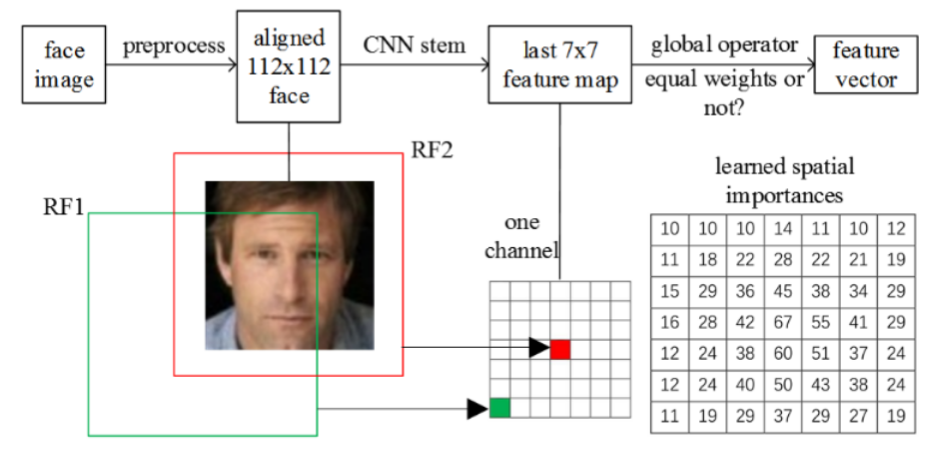
" width="600">
</div>


The architecture of MobileFaceNet is optimized for generating compact and discriminative face embeddings. It follows a streamlined, bottleneck-based design that uses depthwise separable convolutions and residual connections to efficiently extract features from aligned facial images. The network begins with an initial convolutional layer for low-level feature extraction, followed by multiple bottleneck blocks that progressively refine spatial and semantic information.

A key component of MobileFaceNet is the use of depthwise convolutions, which factorize standard convolutions into separate spatial and channel operations. This significantly reduces the number of parameters and floating-point operations while preserving the network’s representational power. The architecture also incorporates linear bottlenecks and inverted residual blocks, enabling the model to maintain high performance despite its compactness.

At the end of the network, a global depthwise convolutional layer aggregates spatial information into a fixed-length feature vector. This embedding is typically normalized and used with a metric-learning loss function, such as ArcFace or CosFace, during training. The final output is a high-quality feature representation that can be used for face verification or identification.

This assignment focuses on understanding and implementing the MobileFaceNet architecture, analyzing how its lightweight design achieves efficiency, and exploring how the final embeddings can be used for practical face verification tasks.

For more information, please refer to the paper: <br>
 [Mobilefacenets: Efficient cnns for accurate real-time face verification on mobile devices (2018)](https://arxiv.org/pdf/1804.07573)

## Installing dependencies

In [1]:
# Install RetinaFace and dependencies
!pip install retina-face
!pip install opencv-python

##Importing the required libraries

In [2]:
import os
import cv2
import numpy as np
from retinaface import RetinaFace
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


RetinaFace is a single-stage face detector designed to accurately locate human faces and key facial landmarks in images. Unlike traditional multi-stage detection pipelines, RetinaFace performs face localization and landmark regression simultaneously, making it both fast and highly reliable. Its architecture is based on a feature pyramid network (FPN) combined with a ResNet backbone, allowing it to detect faces across a wide range of scales and poses.

A key strength of RetinaFace is its use of supervised and self-supervised multi-task learning. In addition to predicting bounding boxes, the model also outputs five facial landmarks (eyes, nose, and mouth corners). This additional supervision significantly improves detection accuracy, especially under challenging conditions such as occlusion, extreme poses, and low resolution.

RetinaFace is widely used in various face-related tasks because it provides robust and consistent face alignment, which serves as an essential preprocessing step for downstream tasks such as face recognition, expression analysis, and identity verification. By ensuring that detected faces are properly localized and aligned, RetinaFace improves the performance and reliability of subsequent models.

In this assignment, we do not train RetinaFace from scratch. Instead, we use a pretrained model solely for face detection and alignment, allowing us to focus on the main objectives of the exercise without the heavy computational cost of training a complex detector.

For more information, please refer to the paper: <br>
 [Retinaface: Single-shot multi-level face localisation in the wild (2020)](https://openaccess.thecvf.com/content_CVPR_2020/papers/Deng_RetinaFace_Single-Shot_Multi-Level_Face_Localisation_in_the_Wild_CVPR_2020_paper.pdf)

##Testing the functionality of RetinaFace

In [3]:
# Load an image
img_path = "Sample.jpg"  # Sample image
img = cv2.imread(img_path)

# Detecting faces
detections = RetinaFace.detect_faces(img_path)

detections

26-01-04 12:44:09 - Directory /root/.deepface created
26-01-04 12:44:09 - Directory /root/.deepface/weights created
26-01-04 12:44:09 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 122MB/s]


{'face_1': {'score': np.float64(0.9996671676635742),
  'facial_area': [np.int64(115), np.int64(39), np.int64(185), np.int64(125)],
  'landmarks': {'right_eye': [np.float32(140.87091), np.float32(69.15896)],
   'left_eye': [np.float32(172.7592), np.float32(71.50676)],
   'nose': [np.float32(161.79831), np.float32(82.43829)],
   'mouth_right': [np.float32(145.09224), np.float32(102.9254)],
   'mouth_left': [np.float32(169.81686), np.float32(104.70493)]}}}

(np.float64(-0.5), np.float64(69.5), np.float64(85.5), np.float64(-0.5))

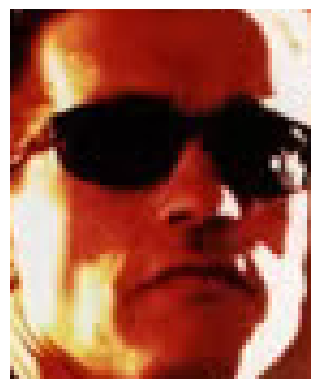

In [4]:
def extract_face(img, detection):
    """
    Crop and align face according to RetinaFace output.
    """
    facial_area = detection["facial_area"]
    x1, y1, x2, y2 = facial_area
    face = img[y1:y2, x1:x2]
    return face

# Example
first_face = list(detections.values())[0]
face_img = extract_face(img, first_face)

plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

##Converting image (10 Points)
Convert the RetinaFace output into an input format compatible with MobileFaceNet

(np.float64(-0.5), np.float64(111.5), np.float64(111.5), np.float64(-0.5))

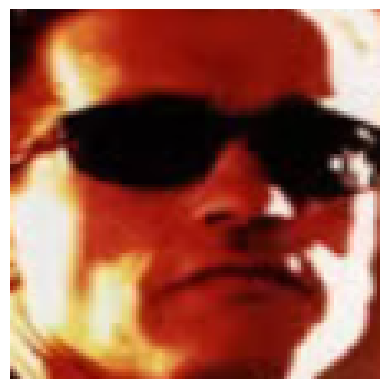

In [5]:
def preprocess_for_mobilefacenet(face):
    # TO DO

    # Resize to 112x112
    face_resized = cv2.resize(face, (112, 112))

    # Convert to RGB
    face_resized = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)

    # Normalize to [0,1]
    face_resized = face_resized.astype(np.float32) / 255.0

    return face_resized

aligned_face = preprocess_for_mobilefacenet(face_img)

plt.imshow(aligned_face)
plt.axis('off')

##MobileFaceNet

The table below shows MobileFaceNet architecture for feature embedding. Each line describes a sequence of operators repeated $n$ times. All layers within the same sequence share the same number $c$ of output channels. The first layer of each sequence uses a stride $s$, while all subsequent layers use stride $1$. All spatial convolutions in the bottleneck blocks employ $3 \times 3$ kernels, and the expansion factor $t$ is always applied to the input size. GDConv7×7 denotes a global depthwise convolution with a $7 \times 7$ kernel.


<div style="text-align: center;">
    <img src="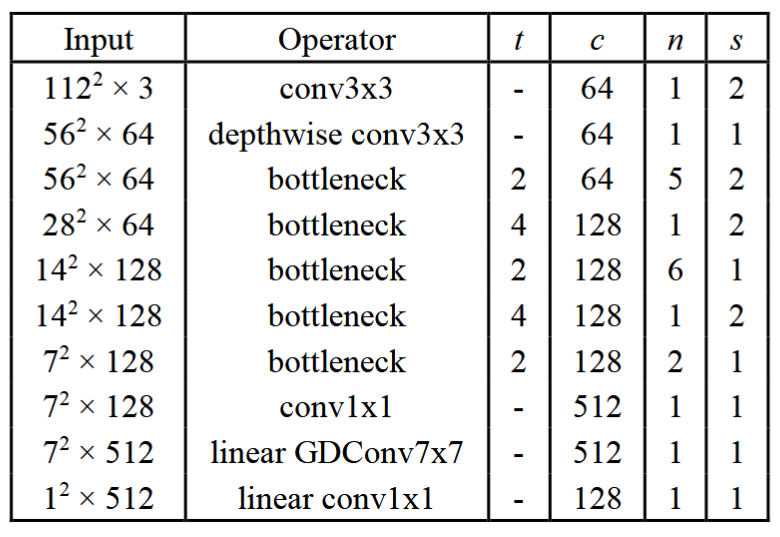
" width="500">
</div>

###Basic building blocks (15 Points)

In [ ]:
class ConvBNPReLU(nn.Module):
    """Convolutional layer with Batch Normalization and PReLU activation"""
    def __init__(self, inp_channels, out_channels, k=3, s=1, p=1, groups=1):
        super().__init__()
        # Build the convolution layer without bias
        self.conv = nn.Conv2d(
            inp_channels, out_channels,
            kernel_size=k,
            stride=s,
            padding=p,
            groups=groups,
            bias=False
        )
        self.bn = nn.BatchNorm2d(out_channels)
        self.prelu = nn.PReLU(out_channels)

    def forward(self, x):
        # Apply conv -> batch norm -> prelu
        x = self.conv(x)
        x = self.bn(x)
        x = self.prelu(x)
        return x

class ConvBN(nn.Module):
    """1x1 Convolution with Batch Normalization (linear bottleneck)"""
    def __init__(self, inp_channels, out_channels):
        super().__init__()
        # Use 1x1 kernel for projection
        self.conv = nn.Conv2d(
            inp_channels, out_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=False
        )
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        # Apply conv then batch norm
        x = self.conv(x)
        x = self.bn(x)
        return x

class LinearBottleneck(nn.Module):
    """
    Inverted residual block inspired by MobileNetV2.
    - expand_ratio: channel expansion multiplier
    - stride: stride for depthwise convolution
    """
    def __init__(self, inp_channels, out_channels, expand_ratio, stride):
        super().__init__()
        # Store stride and check if residual connection should be used
        self.stride = stride
        self.use_residual = (stride == 1 and inp_channels == out_channels)

        expanded_channels = inp_channels * expand_ratio

        block_layers = []

        # Expansion phase (skip if ratio is 1)
        if expand_ratio != 1:
            block_layers.append(
                ConvBNPReLU(inp_channels, expanded_channels, k=1, s=1, p=0)
            )

        # Depthwise convolution phase
        block_layers.append(
            ConvBNPReLU(
                expanded_channels,
                expanded_channels,
                k=3,
                s=stride,
                p=1,
                groups=expanded_channels
            )
        )

        # Projection phase (linear bottleneck)
        block_layers.append(
            ConvBN(expanded_channels, out_channels)
        )

        self.block = nn.Sequential(*block_layers)

    def forward(self, x):
        # Process through block
        result = self.block(x)
        if self.use_residual:
            result = result + x
        return result

### MobileFaceNet Model (25 Points)

In [ ]:
class MobileFaceNet(nn.Module):
    """
    MobileFaceNet for face recognition
    Input: 112x112 RGB image
    Output: 512-dim L2-normalized embedding vector
    """
    def __init__(self, embedding_size=512, multiplier=1.0):
        super().__init__()
        self.embedding_size = embedding_size

        def scale_channels(channels):
            return int(channels * multiplier)

        # Initial convolution layers
        self.conv1 = ConvBNPReLU(3, scale_channels(64), k=3, s=2, p=1)
        self.dw_conv1 = ConvBNPReLU(
            scale_channels(64), scale_channels(64), k=3, s=1, p=1, groups=scale_channels(64)
        )

        # Bottleneck layer configuration: (expansion, channels, repeats, stride)
        self.bottleneck_cfg = [
            (2, 64, 5, 2),
            (4, 128, 1, 2),
            (2, 128, 6, 1),
            (4, 128, 1, 2),
            (2, 128, 2, 1),
        ]

        # Construct bottleneck layers
        block_list = []
        current_channels = scale_channels(64)

        for expansion, channels, num_blocks, initial_stride in self.bottleneck_cfg:
            target_channels = scale_channels(channels)
            for block_idx in range(num_blocks):
                block_stride = initial_stride if block_idx == 0 else 1
                block_list.append(
                    LinearBottleneck(current_channels, target_channels, expand_ratio=expansion, stride=block_stride)
                )
                current_channels = target_channels

        self.bottlenecks = nn.Sequential(*block_list)

        # Convolution after bottleneck blocks
        self.conv2 = ConvBNPReLU(current_channels, scale_channels(512), k=1, s=1, p=0)

        # Global depthwise convolution with 7x7 kernel
        self.gdconv = nn.Conv2d(
            scale_channels(512), scale_channels(512),
            kernel_size=7,
            stride=1,
            padding=0,
            groups=scale_channels(512),
            bias=False
        )
        self.gd_bn = nn.BatchNorm2d(scale_channels(512))

        # Embedding projection layers
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(scale_channels(512), embedding_size)
        self.bn = nn.BatchNorm1d(embedding_size)

        self._initialize_weights()

    def forward(self, x, l2_norm=True):
        # Initial feature extraction
        x = self.conv1(x)
        x = self.dw_conv1(x)

        # Bottleneck processing
        x = self.bottlenecks(x)

        # Final convolutions
        x = self.conv2(x)
        x = self.gdconv(x)
        x = self.gd_bn(x)

        # Generate embedding
        x = self.flatten(x)
        x = self.linear(x)
        x = self.bn(x)

        if l2_norm:
            x = F.normalize(x, p=2, dim=1)

        return x

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d):
                nn.init.kaiming_normal_(module.weight, mode='fan_out')
            elif isinstance(module, nn.Linear):
                nn.init.xavier_normal_(module.weight)
            elif isinstance(module, (nn.BatchNorm2d, nn.BatchNorm1d)):
                nn.init.ones_(module.weight)
                nn.init.zeros_(module.bias)

###Sanity Check

In [ ]:
if __name__ == "__main__":
    model = MobileFaceNet().to(device)
    dummy = torch.randn(2, 3, 112, 112).to(device)
    out = model(dummy)
    print("Output shape:", out.shape)

Output shape: torch.Size([2, 512])


##ArcFace Loss

ArcFace is a margin-based loss function specifically designed for face recognition tasks. Unlike traditional softmax loss, which only encourages correct classification, ArcFace explicitly maximizes the angular margin between embeddings of different identities. This results in highly discriminative feature vectors that are better separated in the embedding space, which is crucial for high-accuracy face verification.

In this assignment, using ArcFace is particularly important because the network is lightweight and has fewer parameters compared to large-scale face recognition models. By applying an angular margin, ArcFace helps the model learn embeddings that are both compact and highly discriminative, ensuring that even a small network can achieve competitive performance on face verification or identification tasks.

<div style="text-align: center;">
    <img src="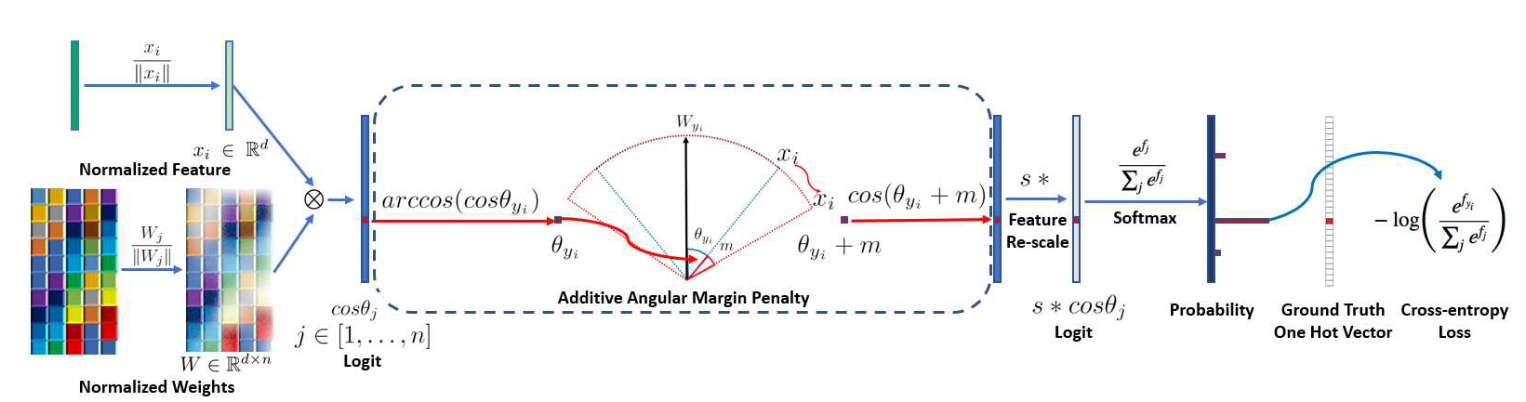
" width="950">
</div>

Let $\mathbf{x}_i$ be the feature embedding of the $i$-th input image, and $\mathbf{W}$ be the weights of the last fully connected layer before softmax. First, both the embedding and the weights are normalized:

$$
\|\mathbf{W}_j\| = 1, \quad \|\mathbf{x}_i\| = 1
$$

The logits for class $j$ are computed as the cosine of the angle between the embedding and the class weight vector:

$$
\cos\theta_j = \mathbf{W}_j^\top \mathbf{x}_i
$$

ArcFace introduces an additive angular margin $m$ to the target logit:

$$
\cos(\theta_{y_i} + m)
$$

where $y_i$ is the ground-truth class for the $i$-th sample. The modified softmax loss becomes:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \log \frac{e^{s \cdot \cos(\theta_{y_i}+m)}}{e^{s \cdot \cos(\theta_{y_i}+m)} + \sum_{j \ne y_i} e^{s \cdot \cos\theta_j}}
$$


Here, $s$ is a scaling factor that controls the magnitude of the logits, which stabilizes training.

For more information, please refer to the paper: <br>
 [ArcFace: Additive Angular Margin Loss for Deep Face Recognition (2018)](https://openaccess.thecvf.com/content_CVPR_2019/papers/Deng_ArcFace_Additive_Angular_Margin_Loss_for_Deep_Face_Recognition_CVPR_2019_paper.pdf)

In [ ]:
class ArcMarginProduct(nn.Module):
    """
    ArcFace: Additive Angular Margin Loss for face recognition
    Input: feature embeddings (B, feature_dim), target labels (B)
    Output: scaled logits (B, num_identities) for cross-entropy loss
    """
    def __init__(self, embedding_size=512, num_classes=10000, s=64.0, m=0.5, easy_margin=False):
        """
        embedding_size: dimensionality of input feature vectors (default 512)
        num_classes: total number of identity classes in training set
        s: feature scale parameter for logit magnification
        m: angular margin penalty applied to target class (in radians)
        easy_margin: if True, use simplified margin condition
        """
        super().__init__()
        self.embedding_size = embedding_size
        self.num_classes = num_classes
        self.s = s
        self.m = m
        self.easy_margin = easy_margin

        # Learnable weight matrix (represents class prototypes)
        self.weight = nn.Parameter(torch.FloatTensor(num_classes, embedding_size))
        nn.init.xavier_uniform_(self.weight)

        # Precompute trigonometric constants for margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, embeddings, labels):
        """
        embeddings: L2-normalized feature vectors from backbone (B, embedding_size)
        labels: ground-truth identity indices (B,)
        """
        # L2-normalize weight vectors (class centers)
        normalized_weights = F.normalize(self.weight, p=2, dim=1)

        # Compute cosine similarity between embeddings and weights
        cos_theta = F.linear(embeddings, normalized_weights)
        sin_theta = torch.sqrt(1.0 - torch.clamp(cos_theta**2, 0, 1))

        # Calculate cos(theta + margin) using angle addition formula
        cos_theta_plus_m = cos_theta * self.cos_m - sin_theta * self.sin_m

        if self.easy_margin:
            cos_theta_plus_m = torch.where(cos_theta > 0, cos_theta_plus_m, cos_theta)
        else:
            cos_theta_plus_m = torch.where(cos_theta > self.th, cos_theta_plus_m, cos_theta - self.mm)

        # Create one-hot encoding for target classes
        target_mask = torch.zeros_like(cos_theta)
        target_mask.scatter_(1, labels.view(-1, 1), 1.0)

        # Apply margin penalty only to target class logits
        logits = (target_mask * cos_theta_plus_m) + ((1.0 - target_mask) * cos_theta)
        logits = logits * self.s

        return logits

##Data loader

###Choosing an Appropriate Training Dataset
Selecting a suitable training dataset is a critical step when training MobileFaceNet from scratch, especially when using ArcFace as the loss function. ArcFace requires multiple samples per identity in order to learn discriminative angular margins; therefore, both the number of classes and the number of images per class directly affect model performance.

A commonly recommended dataset for this assignment is CASIA-WebFace. This dataset contains approximately 494,000 images from 10,575 identities, which provides a strong balance between dataset size and diversity. It is large enough to train ArcFace-based models meaningfully but still manageable in this asignment. CASIA-WebFace also has good identity distribution, making it suitable for learning margin-based losses like ArcFace that depend on intra-class variation.

For more information about this dataset, please refer to the paper: <br>
 [Learning Face Representation from Scratch (2014)](https://arxiv.org/pdf/1411.7923)


 Selecting a suitable training dataset is ultimately up to you, and you are free to choose whichever dataset best matches your computational resources. What matters most is the final performance of your model in Questions 2 and 3. For example, if you decide to use a small dataset such as [LFW](https://www.kaggle.com/datasets/jessicali9530/lfw-dataset), it includes only around 13,000 images of 5,749 individuals, and most identities contain only one or two images. This makes LFW unsuitable as a primary training set for ArcFace, since the loss function requires multiple samples per class to properly learn angular margins. If you still choose to train on LFW, you will need to apply strong data augmentation to artificially increase the number of samples per identity. Even with augmentation, the model’s final accuracy during evaluation is expected to be lower because of the limited intra-class diversity and insufficient number of images per identity. If you want to use the LFW dataset for training, you need to split the data into test and training sets, as LFW dataset will be used to report model evolution metrics in this assignment.

Your training dataset is: CASIA-WebFace


Download link: https://www.kaggle.com/datasets/ntl0601/casia-webface

### Download from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ntl0601/casia-webface")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [ ]:
import os
print(os.listdir('/kaggle/input'))

['casia-webface', 'lfw-dataset']


###Dataset Class (20 Points)

In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import json

In [ ]:
class DatasetCSV(Dataset):
    def __init__(self, root_dir, csv_path=None, transform=None):
        # You can apply any necessary modifications to this code as needed and use it for your assignment.

        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}

        # If CSV exists, use it; otherwise scan the directory
        if csv_path and os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            class_idx = 0
            for i, row in df.iterrows():
                name = row.iloc[0]
                num_images = int(row.iloc[1])

                self.class_to_idx[name] = class_idx
                class_idx += 1

                person_dir = os.path.join(root_dir, name)
                if not os.path.isdir(person_dir):
                    continue
                img_names = sorted(os.listdir(person_dir))[:num_images]
                for img_name in img_names:
                    img_path = os.path.join(person_dir, img_name)
                    self.samples.append((img_path, self.class_to_idx[name]))
        else:
            # Scan directory structure directly
            # Assuming structure: root_dir/person_id/image.jpg
            identities = sorted([d for d in os.listdir(root_dir)
                               if os.path.isdir(os.path.join(root_dir, d))])

            print(f"Found {len(identities)} identities in {root_dir}")

            class_idx = 0
            for identity in identities:
                self.class_to_idx[identity] = class_idx
                class_idx += 1

                person_dir = os.path.join(root_dir, identity)
                img_names = sorted([f for f in os.listdir(person_dir)
                                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

                for img_name in img_names:
                    img_path = os.path.join(person_dir, img_name)
                    self.samples.append((img_path, self.class_to_idx[identity]))

        print(f"Dataset loaded: {len(self.samples)} images from {len(self.class_to_idx)} identities")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        # TO DO
        img_path, label = self.samples[idx]

        # Load image with OpenCV
        face = cv2.imread(img_path)

        # Handle missing/corrupted images
        if face is None:
            face = np.zeros((112, 112, 3), dtype=np.uint8)
        else:
            # Convert BGR to RGB
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

        # Convert to PIL Image
        face = Image.fromarray(face)

        # Apply transforms
        if self.transform:
            face = self.transform(face)

        return face, label


# Transforms
base_transform = transforms.Compose([
    # TO DO
    transforms.Resize((128, 128)),  # Resize to slightly larger
    transforms.RandomCrop((112, 112)),  # Random crop for augmentation
    transforms.RandomHorizontalFlip(p=0.5),  # Horizontal flip
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color augmentation
    transforms.RandomRotation(degrees=10),  # Random rotation
    transforms.ToTensor(),  # Convert to tensor [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])


# You can add additional transformers here if desired.

# Validation transform (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

###Create Datasets

In [ ]:
train_dataset = DatasetCSV(
    root_dir="/kaggle/input/casia-webface",
    csv_path=None,  # Don't use CSV
    transform=base_transform
)

print(f"Number of training samples: {len(train_dataset)}")

Found 10572 identities in /kaggle/input/casia-webface
Dataset loaded: 490623 images from 10572 identities
Number of training samples: 490623


##Dataset Visualization (10 Points)
Display at least four images from the training dataset (after augmentation).

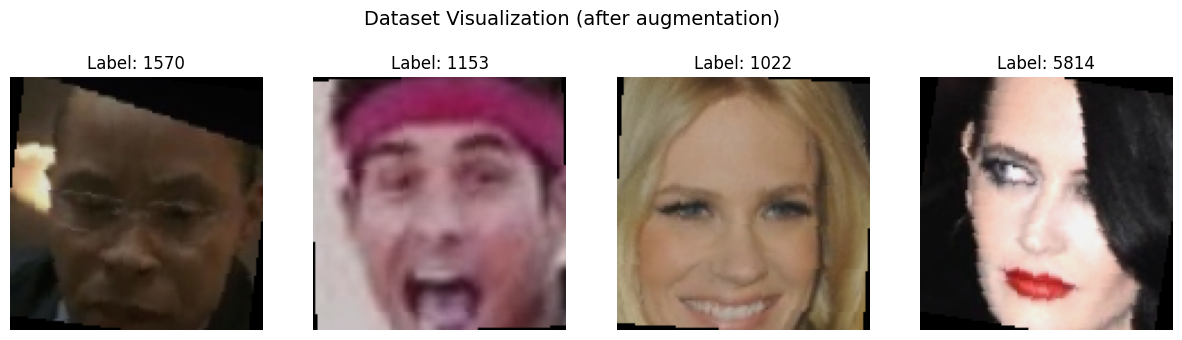

In [ ]:
# TO DO
num_images = 4

# choose some random samples
indices = torch.randperm(len(train_dataset))[:num_images]

fig, axes = plt.subplots(1, num_images, figsize=(15, 4))

for ax, idx in zip(axes, indices):
    img, label = train_dataset[idx]

    # Tensor
    img_show = img.permute(1, 2, 0).numpy()

    # denormalize
    img_show = (img_show * 0.5 + 0.5).clip(0, 1)

    ax.imshow(img_show)
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.suptitle("Dataset Visualization (after augmentation)", fontsize=14)
plt.show()

##Train (40 Points)

In [ ]:
transform = transforms.Compose([
    # TO DO
    transforms.Resize((112, 112)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])


train_dataset = DatasetCSV(
    root_dir="/kaggle/input/casia-webface",
    csv_path=None,  # Don't use CSV
    transform=transform
)

from torch.utils.data import DataLoader
# DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=  128,      # Choose batchsize
    shuffle=True,
    num_workers= 4,      # Choose number of workers (at least 2 worker recommended)
    pin_memory= (device.type == "cuda"),
    persistent_workers=True
)

Found 10572 identities in /kaggle/input/casia-webface
Dataset loaded: 490623 images from 10572 identities


In [ ]:
# Print dataset info
print(f"Number of classes: {len(train_dataset.class_to_idx)}")
print(f"Number of images: {len(train_dataset)}")
print("Some class names:", list(train_dataset.class_to_idx.keys())[:5])

# Check a batch
images, labels = next(iter(train_loader))
print("Batch images shape:", images.shape)
print("Batch labels shape:", labels.shape)

Number of classes: 10572
Number of images: 490623
Some class names: ['000000', '000001', '000002', '000003', '000004']
Batch images shape: torch.Size([128, 3, 112, 112])
Batch labels shape: torch.Size([128])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import json
import os
from tqdm import tqdm

In [ ]:
# Set Hyperparameters, Model and ArcFaceLoss
num_train_classes = 10572
model = MobileFaceNet(embedding_size=512).to(device)
arcface_loss = ArcMarginProduct(
    embedding_size=512,
    num_classes = num_train_classes,
    s=  32.0,               # Moderate scale
    m=  0.4,                # Moderate margin
    easy_margin= True       # Easier optimization
).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    list(model.parameters()) + list(arcface_loss.parameters()),
    lr=1e-4,                # Lower learning rate
    weight_decay=5e-4
)

num_epochs = 10

# Create directory for saving outputs
os.makedirs('/kaggle/working/outputs', exist_ok=True)

# Store metrics for plotting
train_losses = []
train_accs = []

# Training loop
for epoch in range(num_epochs):
    # TO DO
    model.train()
    arcface_loss.train()

    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    # TO DO
    for images, labels in loop:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()

        # Forward
        embeddings = model(images)                  # (B, 512)
        logits = arcface_loss(embeddings, labels)   # (B, num_classes)

        loss = criterion(logits, labels)

        # Backward
        loss.backward()
        optimizer.step()

        # Metrics
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(logits, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(
            loss=loss.item(),
            acc=100.0 * correct / total
        )

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)


    print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Acc={epoch_acc:.3f}%")
    torch.save(model.state_dict(), f"/kaggle/working/outputs/mobilefacenet_epoch{epoch+1}.pth")

# Create directory for saving outputs
os.makedirs('/kaggle/working/outputs', exist_ok=True)

# Store metrics for plotting
train_losses = []
train_accs = []

# Training loop
for epoch in range(num_epochs):
    # TO DO
    model.train()
    arcface_loss.train()

    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    # TO DO
    for images, labels in loop:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()

        # Forward
        embeddings = model(images)                  # (B, 512)
        logits = arcface_loss(embeddings, labels)   # (B, num_classes)

        loss = criterion(logits, labels)

        # Backward
        loss.backward()
        optimizer.step()

        # Metrics
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(logits, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(
            loss=loss.item(),
            acc=100.0 * correct / total
        )

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)


    print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Acc={epoch_acc:.3f}%")
    torch.save(model.state_dict(), f"/kaggle/working/outputs/mobilefacenet_epoch{epoch+1}.pth")

Epoch [1/10]: 100%|██████████| 3833/3833 [19:50<00:00,  3.22it/s, acc=0.000204, loss=17.3]


Epoch 1: Loss=18.0373, Acc=0.000%


Epoch [2/10]: 100%|██████████| 3833/3833 [17:35<00:00,  3.63it/s, acc=0.755, loss=13.5]


Epoch 2: Loss=15.0462, Acc=0.755%


Epoch [3/10]: 100%|██████████| 3833/3833 [17:36<00:00,  3.63it/s, acc=4.1, loss=11]


Epoch 3: Loss=12.1900, Acc=4.095%


Epoch [4/10]: 100%|██████████| 3833/3833 [17:35<00:00,  3.63it/s, acc=7.64, loss=10.1]


Epoch 4: Loss=10.6306, Acc=7.636%


Epoch [5/10]: 100%|██████████| 3833/3833 [17:36<00:00,  3.63it/s, acc=10.7, loss=9.45]


Epoch 5: Loss=9.7231, Acc=10.655%


Epoch [6/10]: 100%|██████████| 3833/3833 [17:30<00:00,  3.65it/s, acc=13.2, loss=8.74]


Epoch 6: Loss=9.1041, Acc=13.233%


Epoch [7/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.63it/s, acc=15.4, loss=8.7]


Epoch 7: Loss=8.6354, Acc=15.418%


Epoch [8/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.63it/s, acc=17.4, loss=8.86]


Epoch 8: Loss=8.2656, Acc=17.424%


Epoch [9/10]: 100%|██████████| 3833/3833 [17:33<00:00,  3.64it/s, acc=19.2, loss=8.85]


Epoch 9: Loss=7.9593, Acc=19.157%


Epoch [10/10]: 100%|██████████| 3833/3833 [17:32<00:00,  3.64it/s, acc=20.6, loss=8.75]


Epoch 10: Loss=7.7037, Acc=20.631%


Epoch [1/10]: 100%|██████████| 3833/3833 [17:33<00:00,  3.64it/s, acc=22, loss=7.43]


Epoch 1: Loss=7.4792, Acc=22.013%


Epoch [2/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.63it/s, acc=23.3, loss=7.81]


Epoch 2: Loss=7.2887, Acc=23.294%


Epoch [3/10]: 100%|██████████| 3833/3833 [17:33<00:00,  3.64it/s, acc=24.4, loss=7.31]


Epoch 3: Loss=7.1144, Acc=24.422%


Epoch [4/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.64it/s, acc=25.5, loss=6.39]


Epoch 4: Loss=6.9598, Acc=25.480%


Epoch [5/10]: 100%|██████████| 3833/3833 [17:33<00:00,  3.64it/s, acc=26.4, loss=6.7]


Epoch 5: Loss=6.8239, Acc=26.381%


Epoch [6/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.63it/s, acc=27.3, loss=7.02]


Epoch 6: Loss=6.6992, Acc=27.267%


Epoch [7/10]: 100%|██████████| 3833/3833 [17:35<00:00,  3.63it/s, acc=28.1, loss=6.42]


Epoch 7: Loss=6.5825, Acc=28.141%


Epoch [8/10]: 100%|██████████| 3833/3833 [17:35<00:00,  3.63it/s, acc=28.9, loss=7.28]


Epoch 8: Loss=6.4811, Acc=28.889%


Epoch [9/10]: 100%|██████████| 3833/3833 [17:32<00:00,  3.64it/s, acc=29.6, loss=6.84]


Epoch 9: Loss=6.3810, Acc=29.644%


Epoch [10/10]: 100%|██████████| 3833/3833 [17:34<00:00,  3.63it/s, acc=30.3, loss=6.88]

Epoch 10: Loss=6.2886, Acc=30.288%


In [ ]:
# Save final model
torch.save(model.state_dict(), "/kaggle/working/outputs/mobilefacenet_final.pth")

# Save training metrics
metrics = {
    'train_losses': train_losses,
    'train_accs': train_accs,
    'num_epochs': num_epochs
}

with open('/kaggle/working/outputs/training_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

print("\nTraining complete!")
print(f"Model saved to: /kaggle/working/outputs/mobilefacenet_final.pth")
print(f"Metrics saved to: /kaggle/working/outputs/training_metrics.json")


Training complete!
Model saved to: /kaggle/working/outputs/mobilefacenet_final.pth
Metrics saved to: /kaggle/working/outputs/training_metrics.json


### Restore data

In [ ]:
import gdown
import zipfile
import os
import torch
import json

In [ ]:
file_id = '1eIlAxDDuoLxjB16-8UK1rvn5ctsbCARc'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, '/kaggle/working/result.zip', quiet=False)

# Unzip
extract_path = '/kaggle/working/restored'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile('/kaggle/working/result.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted successfully!")
print("Contents:", os.listdir(extract_path))

Downloading...
From (original): https://drive.google.com/uc?id=1eIlAxDDuoLxjB16-8UK1rvn5ctsbCARc
From (redirected): https://drive.google.com/uc?id=1eIlAxDDuoLxjB16-8UK1rvn5ctsbCARc&confirm=t&uuid=e33b9138-4fd0-46bf-8a62-7802685d2bbe
To: /kaggle/working/result.zip
100%|██████████| 57.4M/57.4M [00:00<00:00, 85.1MB/s]


Files extracted successfully!
Contents: ['__results___files', 'outputs']


In [ ]:
# Restore model
model = MobileFaceNet(embedding_size=512).to(device)
model.load_state_dict(torch.load('/kaggle/working/restored/outputs/mobilefacenet_final.pth'))
model.eval()

print("Model restored successfully!")

# Restore metrics
with open('/kaggle/working/restored/outputs/training_metrics.json', 'r') as f:
    metrics = json.load(f)

train_losses = metrics['train_losses']
train_accs = metrics['train_accs']

print(f"\nMetrics restored successfully!")
print(f"Number of epochs: {metrics['num_epochs']}")
print(f"Final training loss: {train_losses[-1]:.4f}")
print(f"Final training accuracy: {train_accs[-1]:.3f}%")

Model restored successfully!

Metrics restored successfully!
Number of epochs: 10
Final training loss: 6.2886
Final training accuracy: 30.288%


###Plot training loss and accuracy

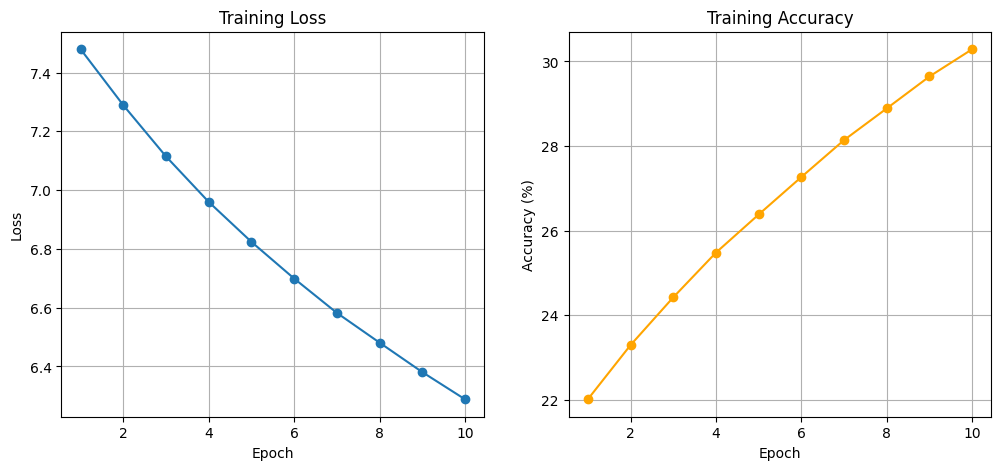

In [ ]:
plt.figure(figsize=(12,5))

# Plot training loss
num_epochs = metrics['num_epochs']
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Plot training accuracy
plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), train_accs, marker='o', color='orange')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.show()

## Face Verification System (Face Unlock)

In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from tqdm import tqdm

Load trained MobileFaceNet model

## Load LFW dataset (15 Points)

The [Labeled Faces in the Wild (LFW)](https://www.kaggle.com/datasets/jessicali9530/lfw-dataset) dataset is one of the most influential benchmarks for evaluating face verification models. It contains nearly 13,000 face images of 5,749 individuals, captured in unconstrained, real-world environments. These images include substantial variations in pose, lighting, occlusion, and facial expression, making LFW a challenging and realistic test set for assessing the robustness of face representation models.

In LFW, the evaluation follows the face verification paradigm rather than face identification. The goal of verification is to determine whether two given images belong to the same individual. Since LFW does not provide a sufficient number of images per identity to support classification-based training, its standard protocol relies on using image pairs. Specifically, LFW defines 6,000 fixed pairs—3,000 positive pairs (same person) and 3,000 negative pairs (different people).

A variety of metrics are commonly used to evaluate performance on LFW. The most widely reported metric is verification accuracy, which measures how often the model correctly determines whether two images belong to the same identity. Additional metrics include the ROC curve,  TAR at a fixed FAR, and TPR@FPR=1e-3, which are especially important in security-critical applications.

For more information about this dataset and metrics, please refer to the paper: <br>
 [Labeled Faces in the Wild: A Database forStudying Face
Recognition in Unconstrained Environments (2008)](https://inria.hal.science/inria-00321923/file/Huang_long_eccv2008-lfw.pdf)

In [ ]:
import os

# Check available datasets
print("Available datasets:")
print(os.listdir('/kaggle/input'))

# Once you find the LFW dataset name, check its structure
# Replace 'lfw-dataset' with the actual dataset name you see above
lfw_dataset_name = 'lfw-dataset'  # UPDATE THIS
print(f"\nContents of {lfw_dataset_name}:")
print(os.listdir(f'/kaggle/input/{lfw_dataset_name}'))

# Check deeper structure
lfw_root = f'/kaggle/input/{lfw_dataset_name}'
for item in os.listdir(lfw_root):
    item_path = os.path.join(lfw_root, item)
    if os.path.isdir(item_path):
        print(f"\n{item}/ contains: {os.listdir(item_path)[:5]}...")  # Show first 5

Available datasets:
['casia-webface', 'lfw-dataset']

Contents of lfw-dataset:
['mismatchpairsDevTrain.csv', 'matchpairsDevTest.csv', 'pairs.csv', 'lfw_allnames.csv', 'peopleDevTest.csv', 'lfw-deepfunneled', 'people.csv', 'peopleDevTrain.csv', 'mismatchpairsDevTest.csv', 'lfw_readme.csv', 'matchpairsDevTrain.csv']

lfw-deepfunneled/ contains: ['lfw-deepfunneled']...


In [ ]:
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

def load_lfw_embeddings(model, root):
    """
    Loads all images, extracts embeddings using MobileFaceNet,
    and returns a dict: {identity_name: [embedding1, embedding2, ...]}
    """

    # Define transform for LFW images
    transform = transforms.Compose([
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    embeddings_dict = {}
    model.eval()

    for person in sorted(os.listdir(root)):
        person_path = os.path.join(root, person)
        if not os.path.isdir(person_path):
            continue

        person_embeddings = []

        for imgname in os.listdir(person_path):
            img_path = os.path.join(person_path, imgname)

            # Skip non-image files
            if not imgname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            # Load image
            try:
                img = Image.open(img_path).convert('RGB')
            except:
                continue

            # Convert to tensor
            img_tensor = transform(img).unsqueeze(0).to(device)

            # Extract embedding
            with torch.no_grad():
                emb = model(img_tensor).cpu().numpy().squeeze()

            person_embeddings.append(emb)

        if len(person_embeddings) > 0:
            embeddings_dict[person] = np.array(person_embeddings)

    return embeddings_dict

# Correct path for LFW dataset
lfw_dir = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'

print("Extracting embeddings from LFW dataset...")
lfw_embeddings = load_lfw_embeddings(model, lfw_dir)
print(f"Identities loaded: {len(lfw_embeddings)}")
print(f"Total images: {sum(len(embs) for embs in lfw_embeddings.values())}")

Extracting embeddings from LFW dataset...
Identities loaded: 5749
Total images: 13233


##Create Positive and Negative Pairs (15 Points)

In [ ]:
def generate_pairs(emb_dict):
    pos_pairs = []
    neg_pairs = []

    persons = list(emb_dict.keys())

    # Positive pairs - same person, different images
    for person in persons:
        embeddings = emb_dict[person]
        # Generate all combinations of pairs from same person
        for i in range(len(embeddings)):
            for j in range(i + 1, len(embeddings)):
                pos_pairs.append((embeddings[i], embeddings[j], 1))  # label 1 for same person

    # Negative pairs - different persons
    for i in range(len(persons)):
        person1 = persons[i]
        embeddings1 = emb_dict[person1]

        for j in range(i + 1, len(persons)):
            person2 = persons[j]
            embeddings2 = emb_dict[person2]

            # Take one random pair between two different persons
            # (to avoid explosion of negative pairs)
            emb1 = embeddings1[np.random.randint(0, len(embeddings1))]
            emb2 = embeddings2[np.random.randint(0, len(embeddings2))]
            neg_pairs.append((emb1, emb2, 0))  # label 0 for different persons

    return pos_pairs, neg_pairs


positive_pairs, negative_pairs = generate_pairs(lfw_embeddings)

print("Positive pairs:", len(positive_pairs))
print("Negative pairs:", len(negative_pairs))

Positive pairs: 242257
Negative pairs: 16522626


##Compute Similarities (10 Points)

In [ ]:
def cosine_similarity(a, b):
    """
    Computes the cosine similarity of two vectors.
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)

    return similarity


all_scores = []
all_labels = []

# Compute similarity scores
for a, b, label in tqdm(positive_pairs + negative_pairs):
    score = cosine_similarity(a, b)
    all_scores.append(score)
    all_labels.append(label)

all_scores = np.array(all_scores)
all_labels = np.array(all_labels)

df = pd.DataFrame({'score': all_scores, 'label': all_labels})
df.head(10)

100%|██████████| 16764883/16764883 [02:10<00:00, 128932.55it/s]


,score,label
0,0.821587,1
1,0.865304,1
2,0.611463,1
3,0.851864,1
4,0.540568,1
5,0.607525,1
6,0.741336,1
7,0.828974,1
8,0.624566,1
9,0.541150,1


##LFW Verification Benchmark (15 Points)

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

# Best threshold (maximize TPR - FPR or Youden's index)
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]

print("Best threshold:", best_threshold)

# Compute accuracy
predictions = (all_scores >= best_threshold).astype(int)
accuracy = np.mean(predictions == all_labels)

print("LFW Accuracy:", accuracy)
print("AUC:", roc_auc)

# TPR@FPR=1e-3
idx = np.argmin(np.abs(fpr - 1e-3))
print("TPR @ FPR=1e-3:", tpr[idx])

# TAR@FAR
far_list = [1e-2, 1e-3, 1e-4]
for far in far_list:
    idx = np.argmin(np.abs(fpr - far))
    print(f"TAR @ FAR={far}:", tpr[idx])

Best threshold: 0.6080324
LFW Accuracy: 0.8088617737445588
AUC: 0.8256498279470432
TPR @ FPR=1e-3: 0.11052312213888556
TAR @ FAR=0.01: 0.2670841296639519
TAR @ FAR=0.001: 0.11052312213888556
TAR @ FAR=0.0001: 0.04299566163206842


##ROC Curve

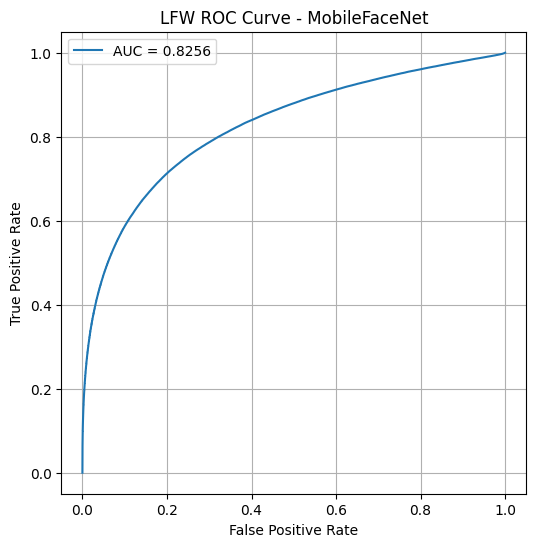

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LFW ROC Curve - MobileFaceNet")
plt.legend()
plt.grid(True)
plt.show()

##Face Verification (25 Points)
Test your face Verification system by two sample images

In [ ]:
def verify(img_path1, img_path2, threshold=best_threshold):
    # Define transform
    transform = transforms.Compose([
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load images
    img1 = Image.open(img_path1).convert('RGB')
    img2 = Image.open(img_path2).convert('RGB')

    # Preprocess
    img1_tensor = transform(img1).unsqueeze(0).to(device)
    img2_tensor = transform(img2).unsqueeze(0).to(device)

    # Embeddings
    model.eval()
    with torch.no_grad():
        emb1 = model(img1_tensor).cpu().numpy().squeeze()
        emb2 = model(img2_tensor).cpu().numpy().squeeze()

    # Similarity
    sim = cosine_similarity(emb1, emb2)
    result = "Same person" if sim >= threshold else "Different person"

    return sim, result

You may replace imgA and imgB with any other images

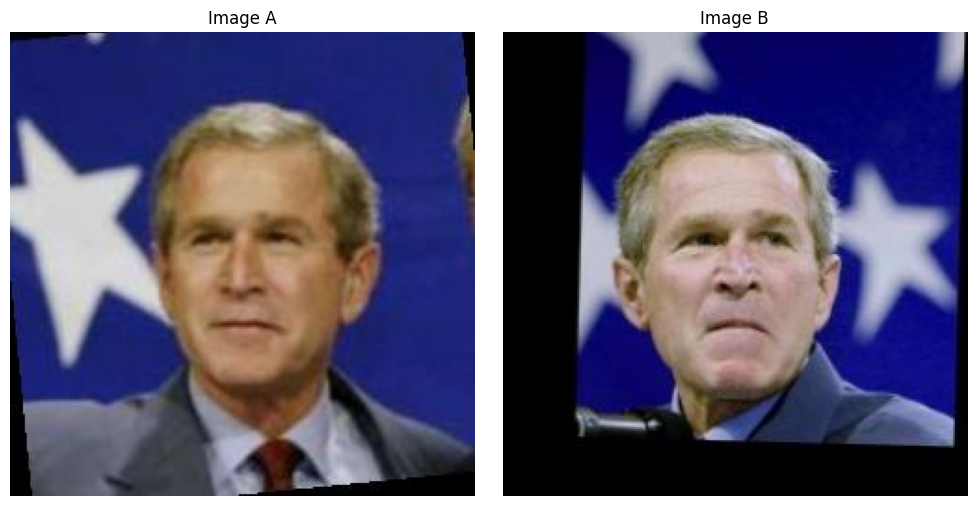

Similarity: 0.85783786
Same person: Same person


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Example usage - UPDATE THESE PATHS for Kaggle
imgA = "/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/George_W_Bush/George_W_Bush_0001.jpg"
imgB = "/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/George_W_Bush/George_W_Bush_0002.jpg"

# Visualize imgA and imgB
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

img1 = Image.open(imgA)
img2 = Image.open(imgB)

axes[0].imshow(img1)
axes[0].set_title("Image A")
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title("Image B")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Print results
sim, same = verify(imgA, imgB)
print("Similarity:", sim)
print("Same person:", same)